In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True, font_scale=1.5)
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#rose=pd.read_csv('Rose.csv',parse_dates=True,squeeze=True,index_col=0)
rose=pd.read_csv('Rose.csv')

In [3]:
display(rose.head())
display(rose.tail())

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [4]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [6]:
rose['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [7]:
rose = rose.set_index('Time_Stamp')
rose.drop(['YearMonth'], axis=1, inplace=True)
rose.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


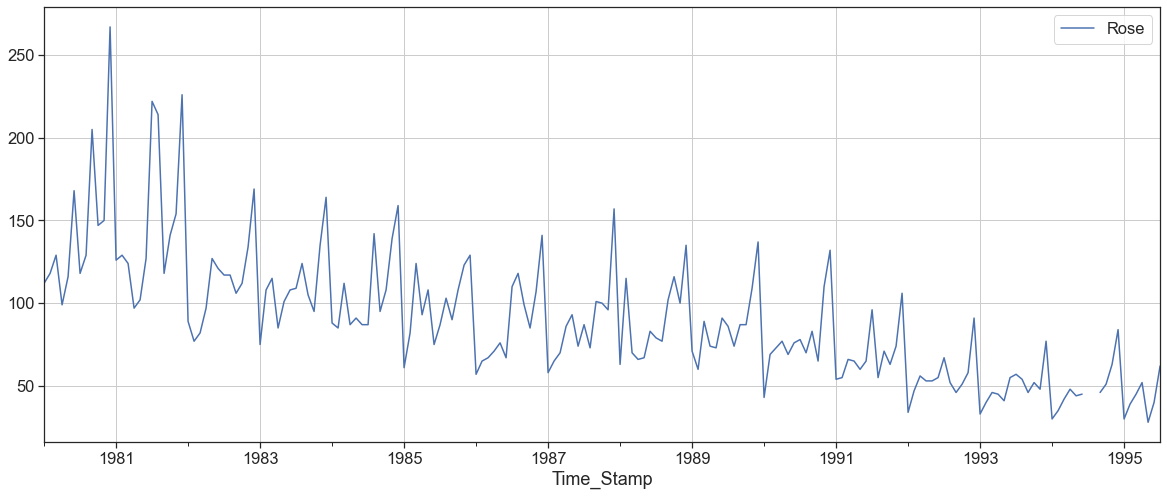

In [8]:
rose.plot(figsize=(20,8))
plt.grid();

In [9]:
rose.isna().sum()

Rose    2
dtype: int64

In [10]:
rose=rose.interpolate(method='linear')

In [11]:
rose.isna().sum()

Rose    0
dtype: int64

In [12]:
#Monthly Sales
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month_name(),
                                            index = rose.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


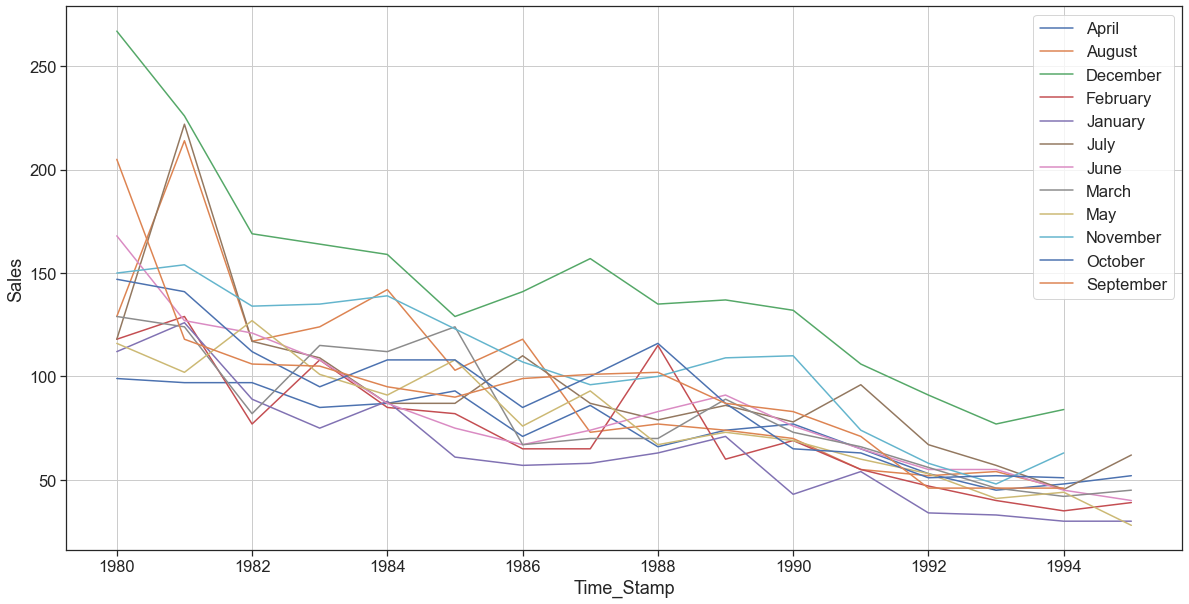

In [13]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.ylabel("Sales")
plt.legend(loc='best');

In [14]:
round(rose.describe(),3)

,Rose
count,187.000
mean,89.914
std,39.238
min,28.000
25%,62.500
50%,85.000
75%,111.000
max,267.000


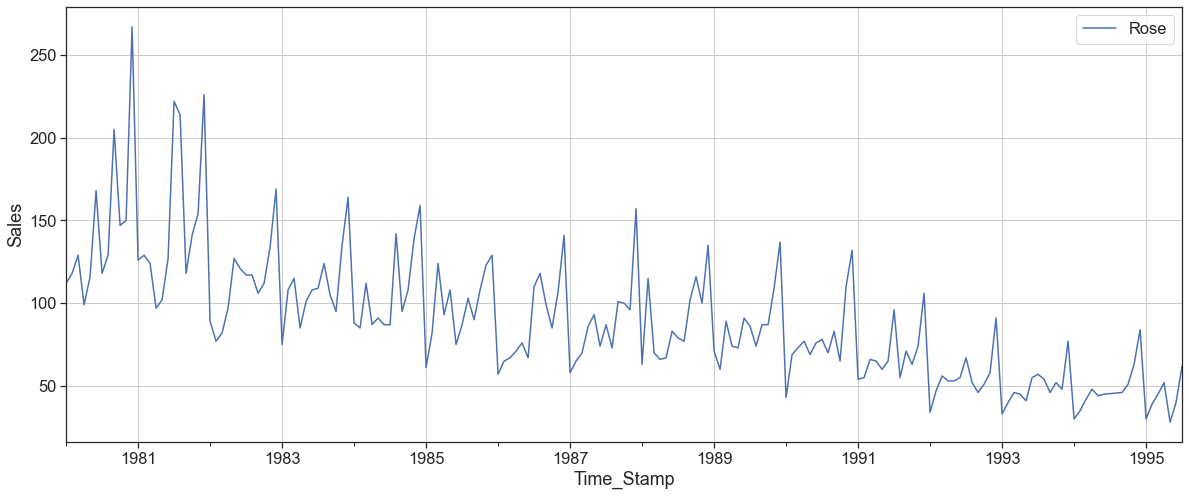

In [15]:
rose.plot(figsize=(20,8))
plt.ylabel("Sales")
plt.grid();

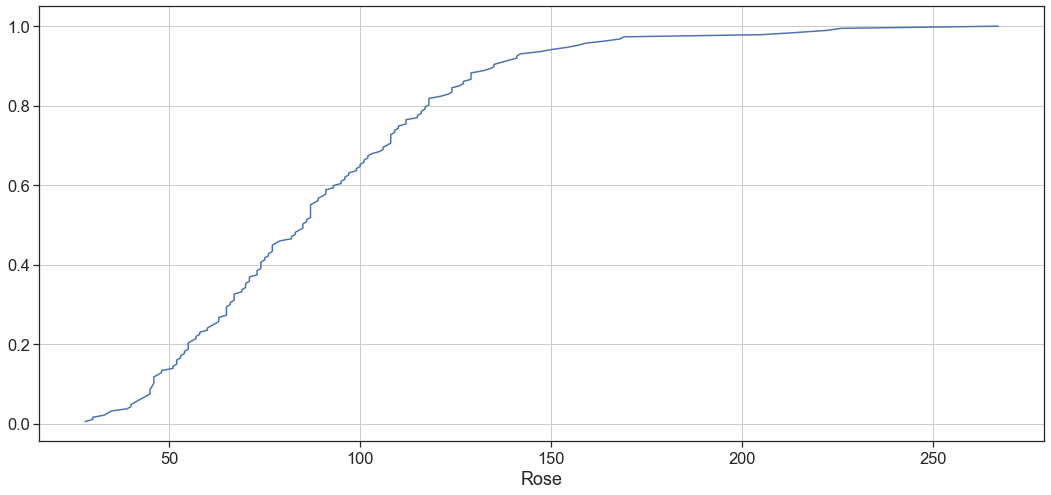

In [16]:
plt.figure(figsize=(18, 8))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

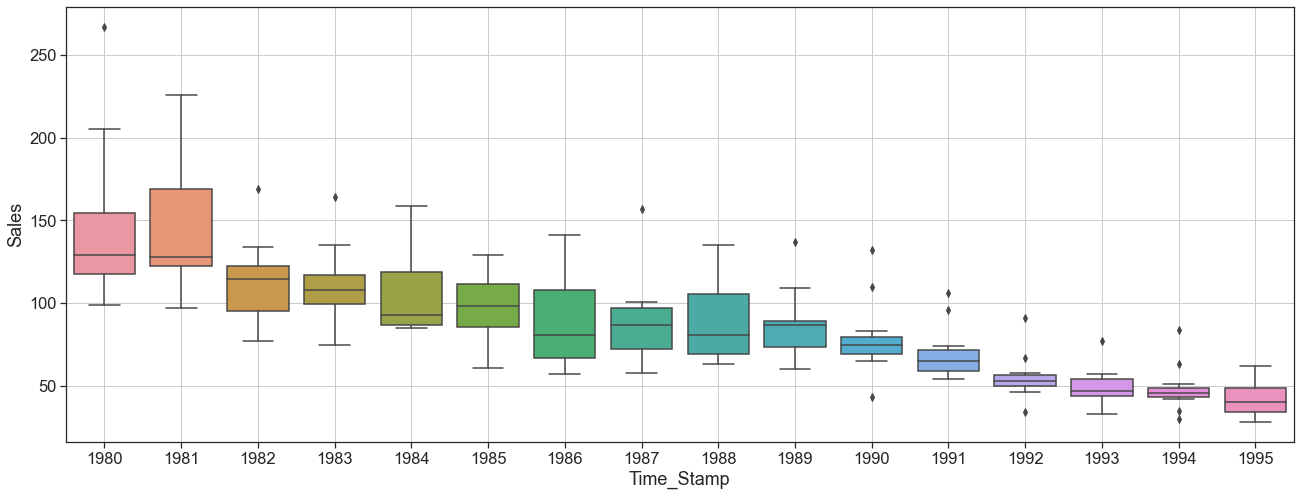

In [17]:
#Yearly Boxplot
fig,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.year,y = rose.values[:,0],ax=ax)
plt.ylabel('Sales')
plt.grid();

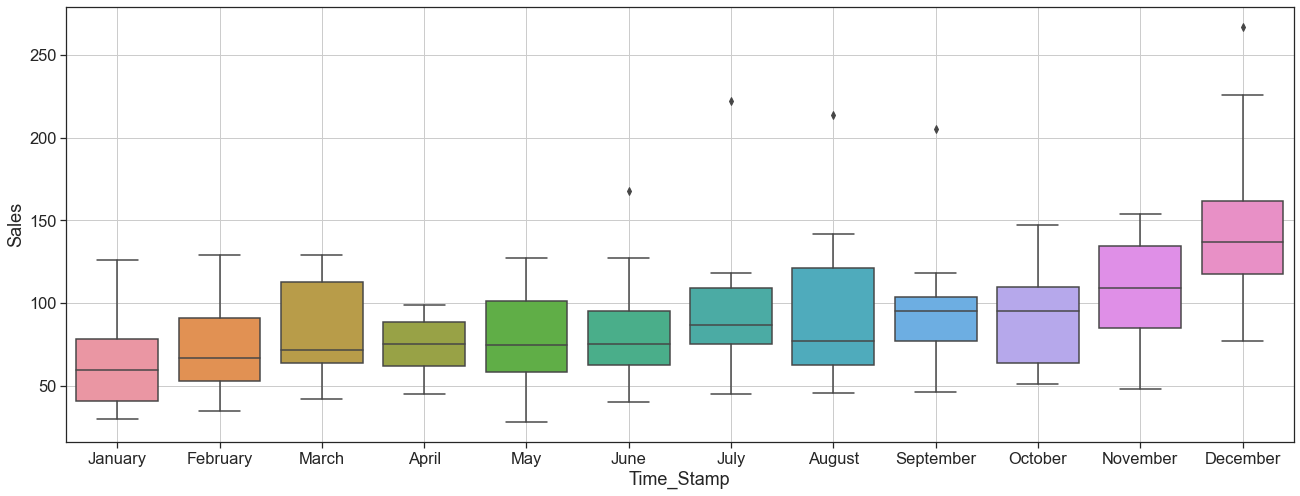

In [18]:
#Monthly Plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose.values[:,0],ax=ax)
plt.ylabel('Sales')
plt.grid();

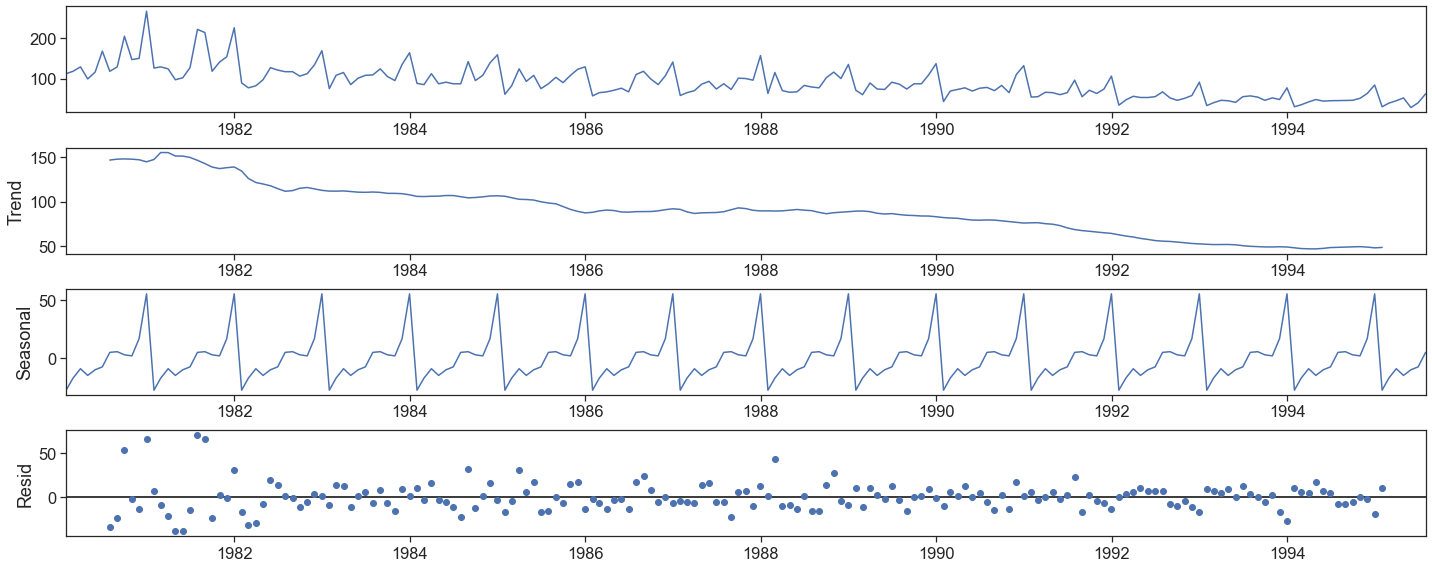

In [19]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(rose,model='additive')
decomposition.plot();

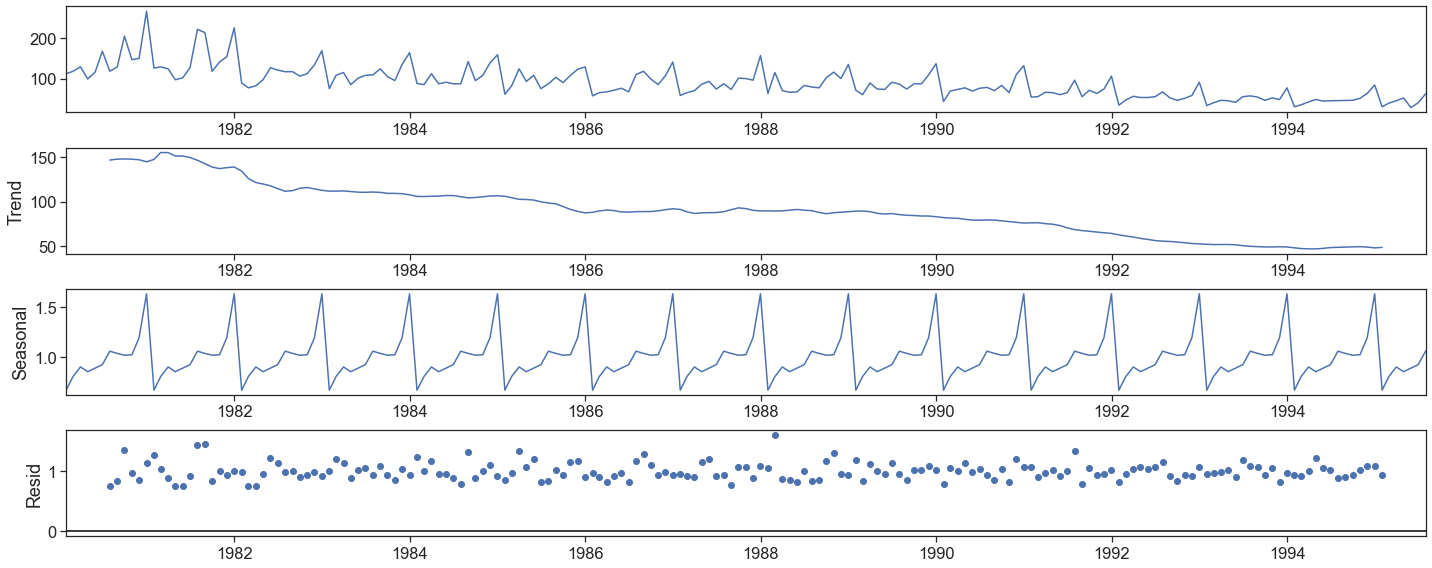

In [20]:
decomposition = seasonal_decompose(rose,model='multiplicative')
rcParams['figure.figsize'] = 20,8
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [22]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
print('Trend','\n',trend.tail(12),'\n')
print('Seasonality','\n',seasonality.tail(12),'\n')
print('Residual','\n',residual.tail(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

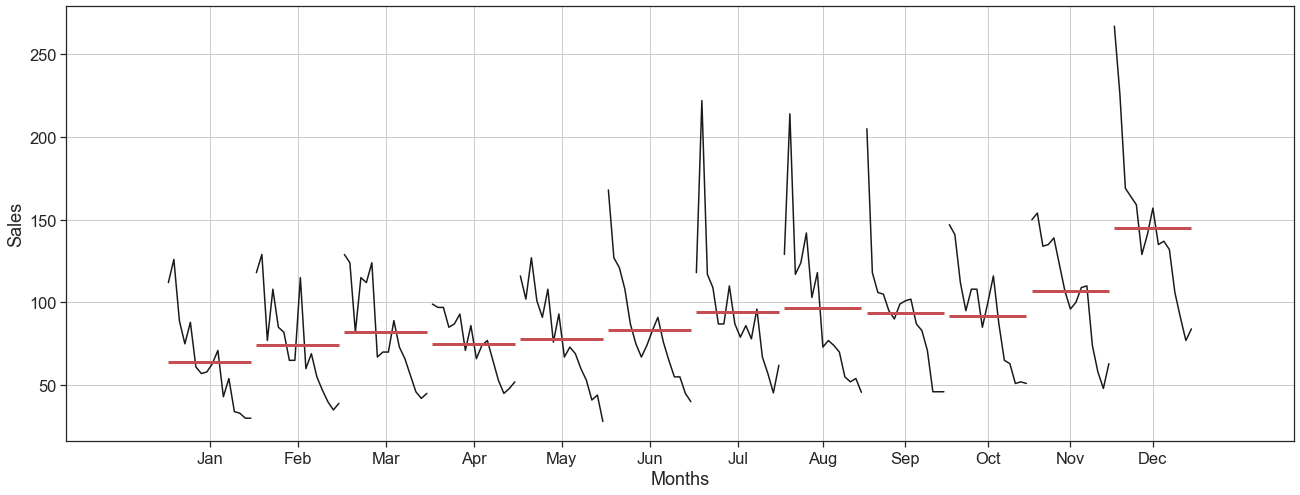

In [23]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(rose,ax=ax)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.grid();

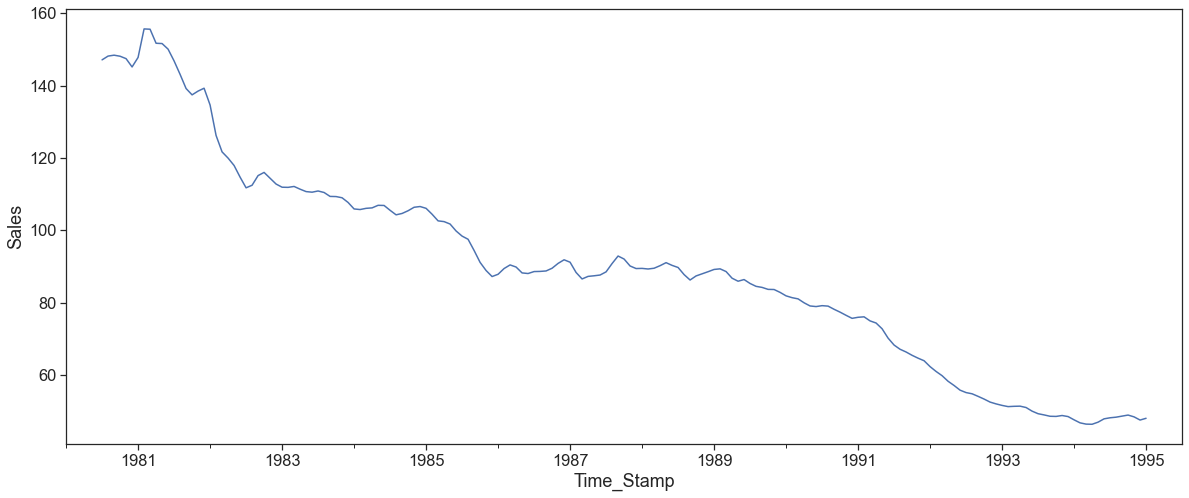

In [24]:
rcParams['figure.figsize'] = 20,8
plt.ylabel('Sales')
trend.plot();

In [25]:
#Split Data into training and test data
train=rose[rose.index.year < 1991]
test=rose[rose.index.year >= 1991]

In [26]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


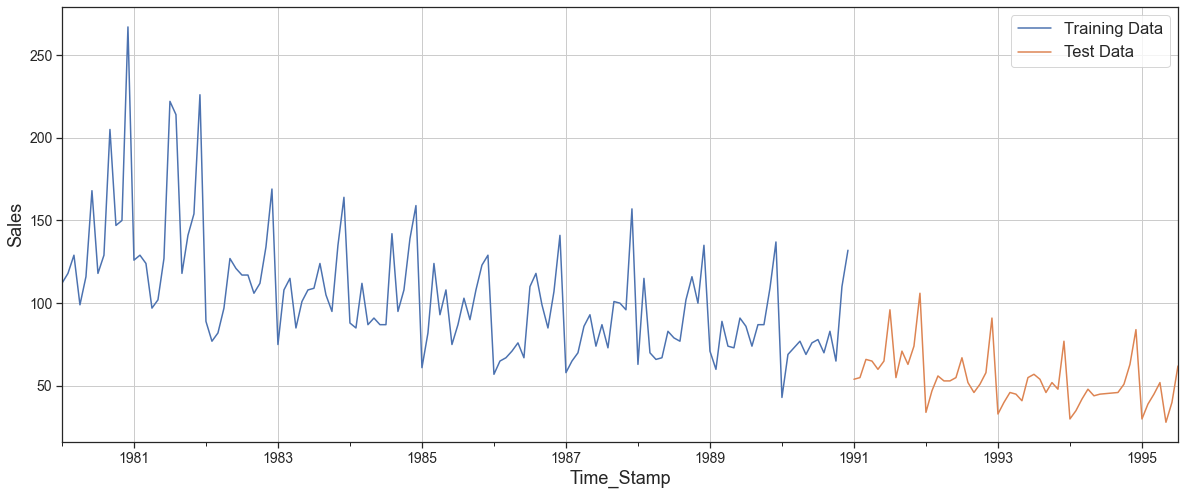

In [28]:
#Joint Plot of Train and Test Data
train['Rose'].plot(figsize=(20,8), fontsize=14)
test['Rose'].plot(figsize=(20,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.ylabel('Sales')
plt.show()

In [29]:
# Model 1: Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [32]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

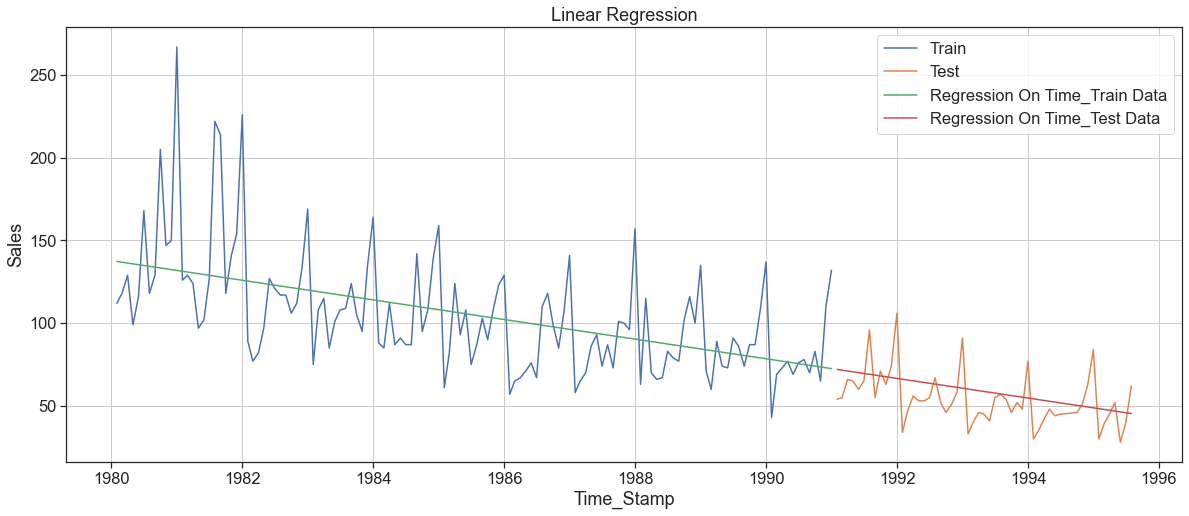

In [33]:
train_predictions_model1            = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1             = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']  = test_predictions_model1

plt.figure(figsize=(20,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [34]:
#Model Evaluation
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [35]:
import math
rmse = metrics.mean_squared_error(test['Rose'],test_predictions_model1)
math.sqrt(rmse)

15.268955197146555

In [36]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
mape_model1_train

21.22

In [37]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269
For RegressionOnTime forecast on the Test Data,  MAPE is 22.820


In [38]:
results = pd.DataFrame({'Train RMSE': [rmse_model1_train],'Test RMSE': [rmse_model1_test],
                        'Train MAPE': [mape_model1_train],'Test MAPE': [mape_model1_test]},
                       index=['RegressionOnTime'])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82


In [39]:
#Model 2: Naive Approach
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
display(NaiveModel_train['naive'].head())
NaiveModel_test['naive'] = np.asarray(test['Rose'])[len(np.asarray(test['Rose']))-1]
display(NaiveModel_test['naive'].head())

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

Time_Stamp
1991-01-31    62.0
1991-02-28    62.0
1991-03-31    62.0
1991-04-30    62.0
1991-05-31    62.0
Name: naive, dtype: float64

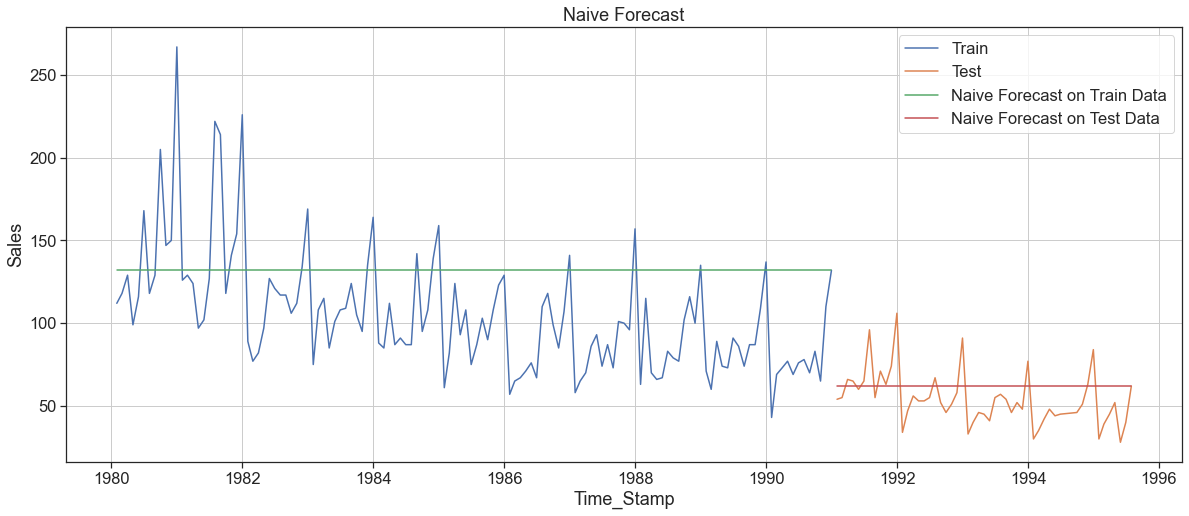

In [41]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [42]:
## Train Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(45.06375954403299, 36.38)

In [43]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.740
For RegressionOnTime forecast on the Test Data,  MAPE is 27.410


In [44]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [rmse_model2_train],'Test RMSE': [rmse_model2_test],
                            'Train MAPE': [mape_model2_train],'Test MAPE': [mape_model2_test]}
                           ,index=['NaiveModel'])

results = pd.concat([results, resultsDf_2])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41


In [45]:
#Simple Average
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
display(SimpleAverage_train.head())
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
display(SimpleAverage_test.head())

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


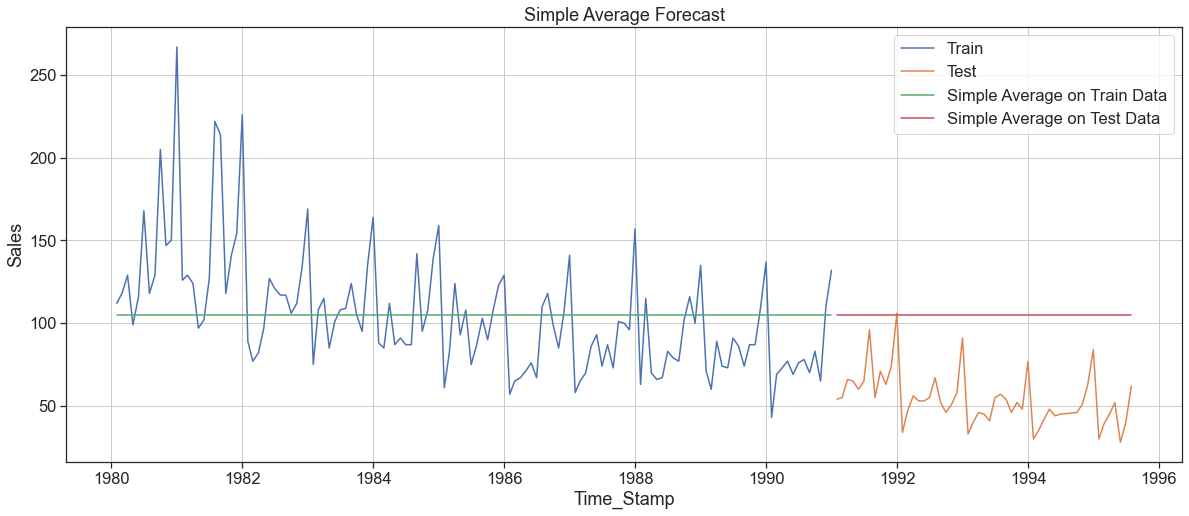

In [47]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [48]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])

In [49]:
resultsDf_3 = pd.DataFrame({'Train RMSE': [rmse_model3_train],'Test RMSE': [rmse_model3_test],
                            'Train MAPE': [mape_model3_train],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

results = pd.concat([results, resultsDf_3])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41
SimpleAverageModel,36.034234,53.460570,25.39,94.93


In [50]:
#Moving Average
MovingAverage = rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [51]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


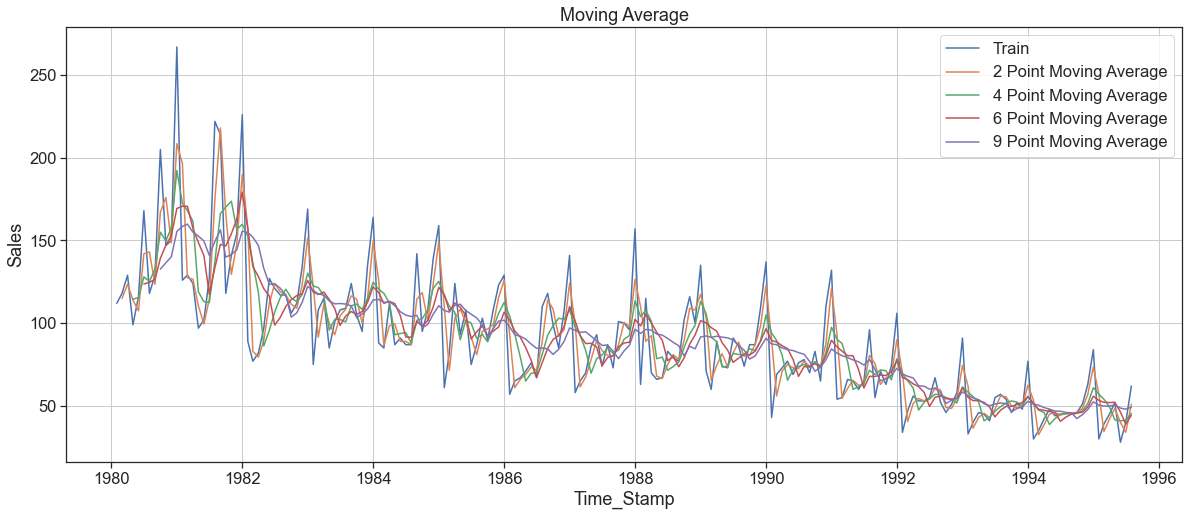

In [52]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [53]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

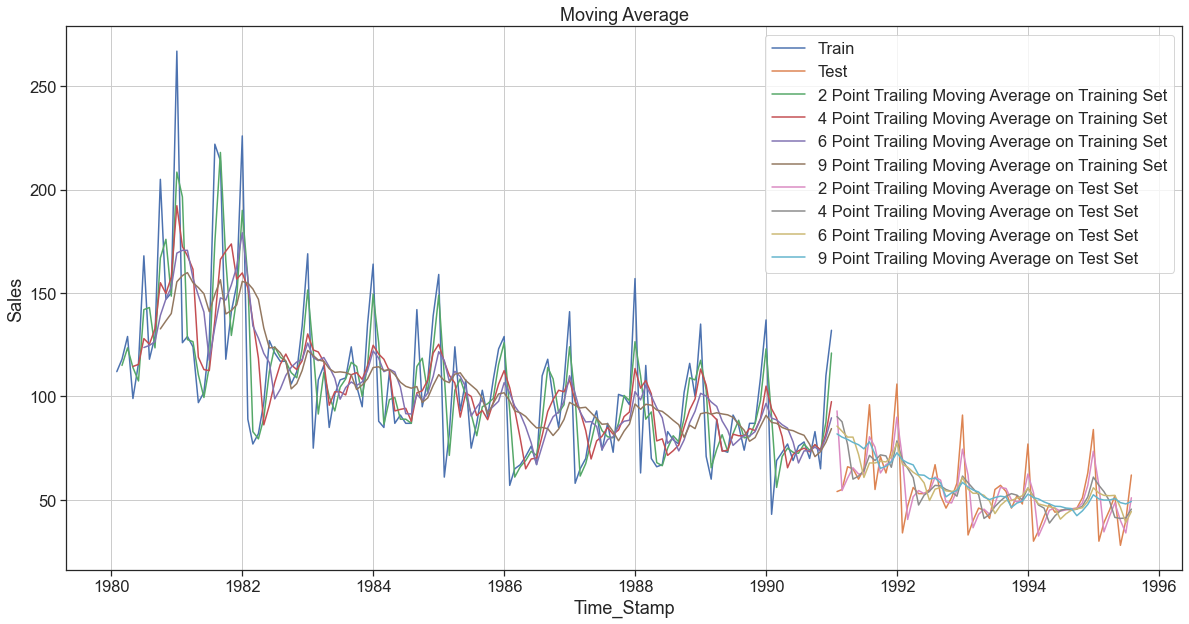

In [54]:
plt.figure(figsize=(20,10))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label = '2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label = '4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'], label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label = '2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Moving Average")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [55]:
train['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1990-08-31     70.0
1990-09-30     83.0
1990-10-31     65.0
1990-11-30    110.0
1990-12-31    132.0
Name: Rose, Length: 132, dtype: float64

In [56]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))
print("For 2 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))
print("For 4 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))
print("For 6 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f " %(rmse_model4_test_9))
print("For 9 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 11.529
For 2 point Moving Average Model forecast on the Testing Data,  MAPE is 13.540
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 14.451
For 4 point Moving Average Model forecast on the Testing Data,  MAPE is 19.490
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 14.566
For 6 point Moving Average Model forecast on the Testing Data,  MAPE is 20.820
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 14.728 
For 9 point Moving Average Model forecast on the Testing Data,  MAPE is 21.010


In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],
                            'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results = pd.concat([results, resultsDf_4])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41
SimpleAverageModel,36.034234,53.460570,25.39,94.93
2pointTrailingMovingAverage,NaN,11.529278,NaN,13.54
4pointTrailingMovingAverage,NaN,14.451403,NaN,19.49
6pointTrailingMovingAverage,NaN,14.566327,NaN,20.82
9pointTrailingMovingAverage,NaN,14.727630,NaN,21.01


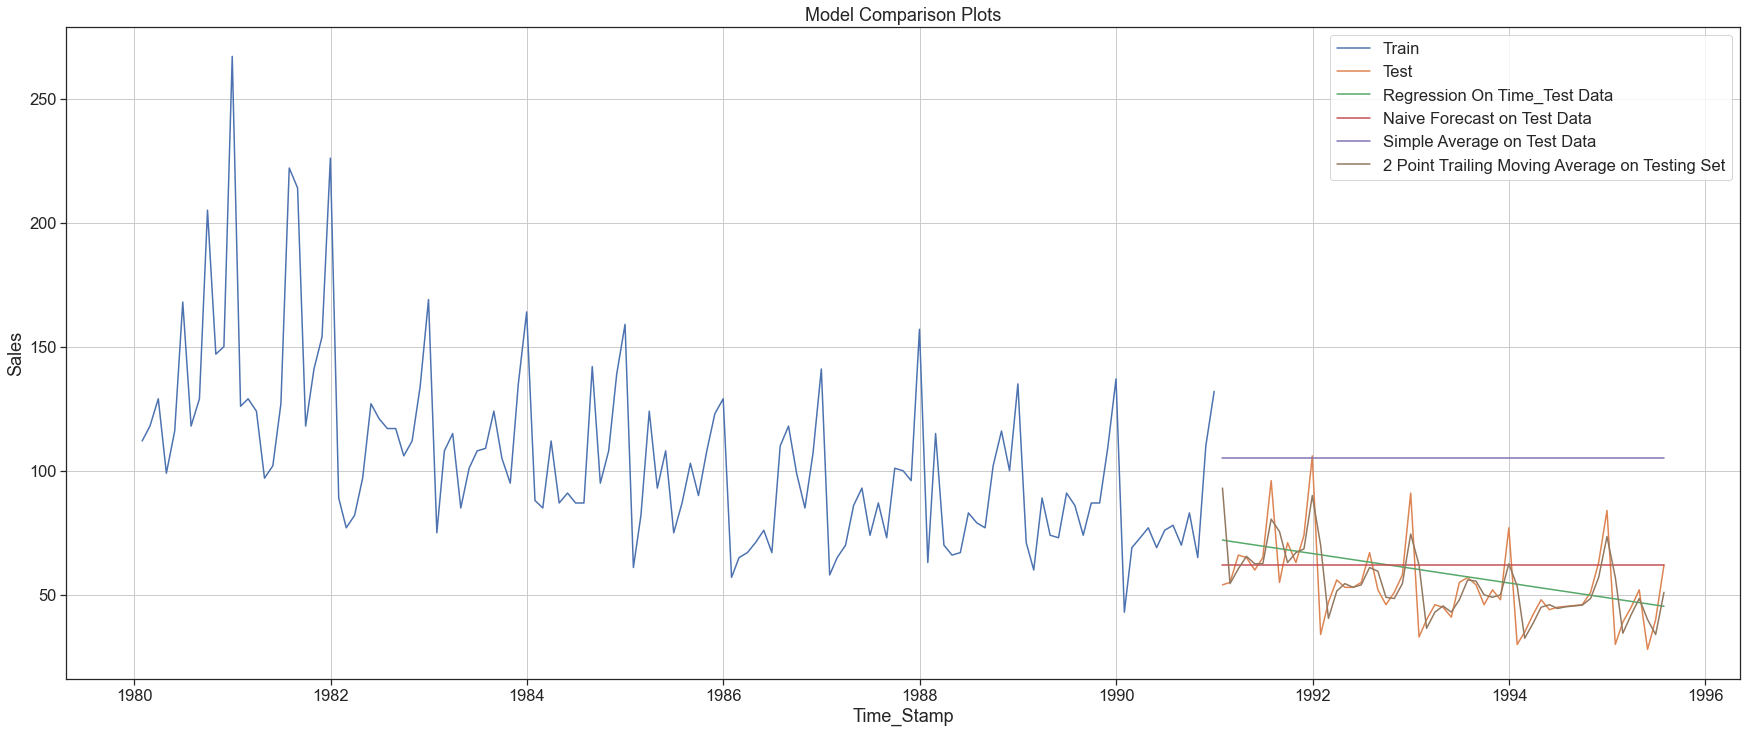

In [58]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Testing Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [59]:
#Simple Exponential Smoothing
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [61]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.105001
1991-02-28,55.0,87.105001
1991-03-31,66.0,87.105001
1991-04-30,65.0,87.105001
1991-05-31,60.0,87.105001


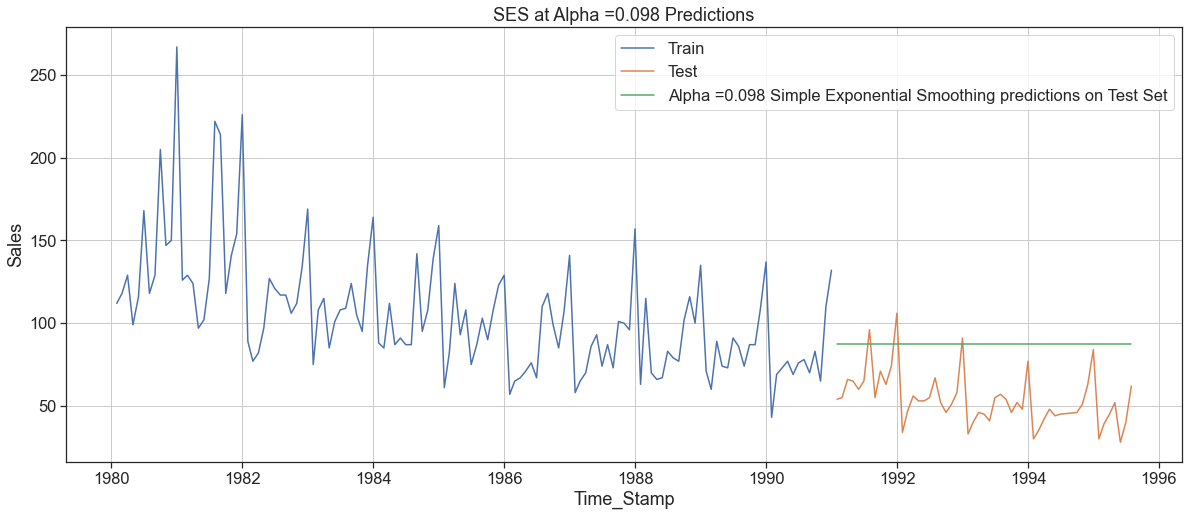

In [63]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES at Alpha =0.098 Predictions')
plt.xlabel("Time_Stamp")
plt.ylabel("Sales");

In [64]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is %3.3f" %(mape_model5_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796
For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is 63.880


In [65]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},
                           index=['Alpha=0.098,SimpleExponentialSmoothing'])

results1 = pd.concat([results['Test RMSE'], resultsDf_5['Test RMSE']])
results1

RegressionOnTime                          15.268955
NaiveModel                                17.740327
SimpleAverageModel                        53.460570
2pointTrailingMovingAverage               11.529278
4pointTrailingMovingAverage               14.451403
6pointTrailingMovingAverage               14.566327
9pointTrailingMovingAverage               14.727630
Alpha=0.098,SimpleExponentialSmoothing    36.796243
Name: Test RMSE, dtype: float64

In [66]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

In [67]:
resultsDf_6.sort_values(by=['Test MAPE'])

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,22.47,36.828033,63.94
1,0.2,31.979391,22.20,41.361876,72.21
2,0.3,32.470164,22.31,47.504821,83.71
3,0.4,33.035130,22.50,53.767406,95.50
4,0.5,33.682839,22.68,59.641786,106.81
5,0.6,34.441171,22.88,64.971288,117.04
6,0.7,35.323261,23.08,69.698162,126.07
7,0.8,36.334596,23.41,73.773992,133.83
8,0.9,37.482782,23.93,77.139276,140.22


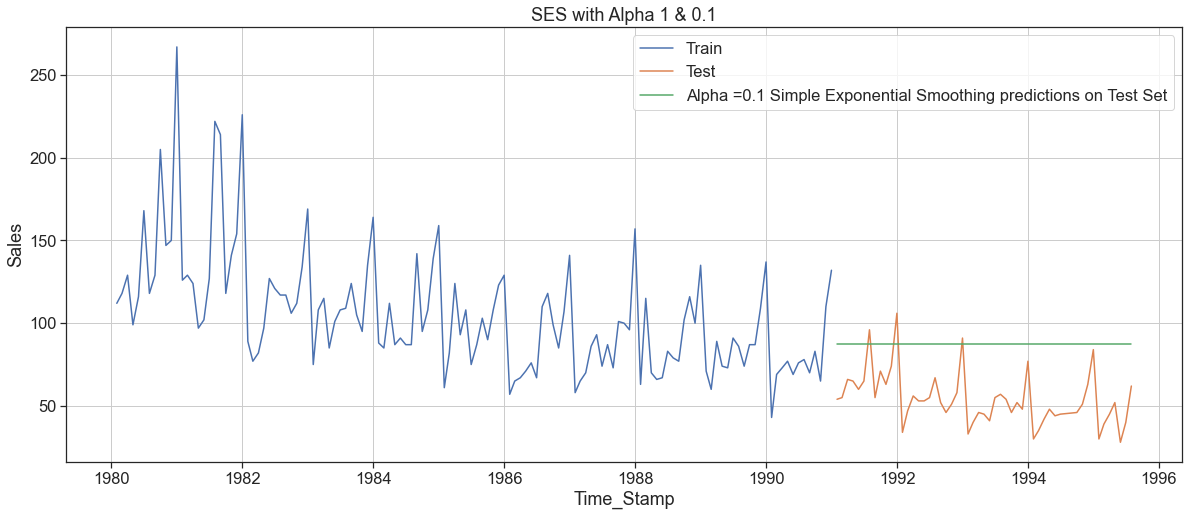

In [68]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("SES with Alpha 1 & 0.1")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [69]:
resultsDf_6_1 = pd.DataFrame({'Train RMSE': [resultsDf_6['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_6['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_6['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDf_6_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41
SimpleAverageModel,36.034234,53.460570,25.39,94.93
2pointTrailingMovingAverage,NaN,11.529278,NaN,13.54
4pointTrailingMovingAverage,NaN,14.451403,NaN,19.49
6pointTrailingMovingAverage,NaN,14.566327,NaN,20.82
9pointTrailingMovingAverage,NaN,14.727630,NaN,21.01
"Alpha=0.1,SimpleExponentialSmoothing",31.815610,36.828033,22.47,63.94


In [70]:
#Double Exponential Smoothing
DES_train = train.copy()
DES_test = test.copy()

In [71]:
model_DES = Holt(DES_train['Rose'])

In [72]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.12981260063088668,
 'smoothing_trend': 0.05376220098709802,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 145.73070601479063,
 'initial_trend': -0.10069596155782001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,86.161875
1991-02-28,55.0,86.247204
1991-03-31,66.0,86.332532
1991-04-30,65.0,86.417860
1991-05-31,60.0,86.503188


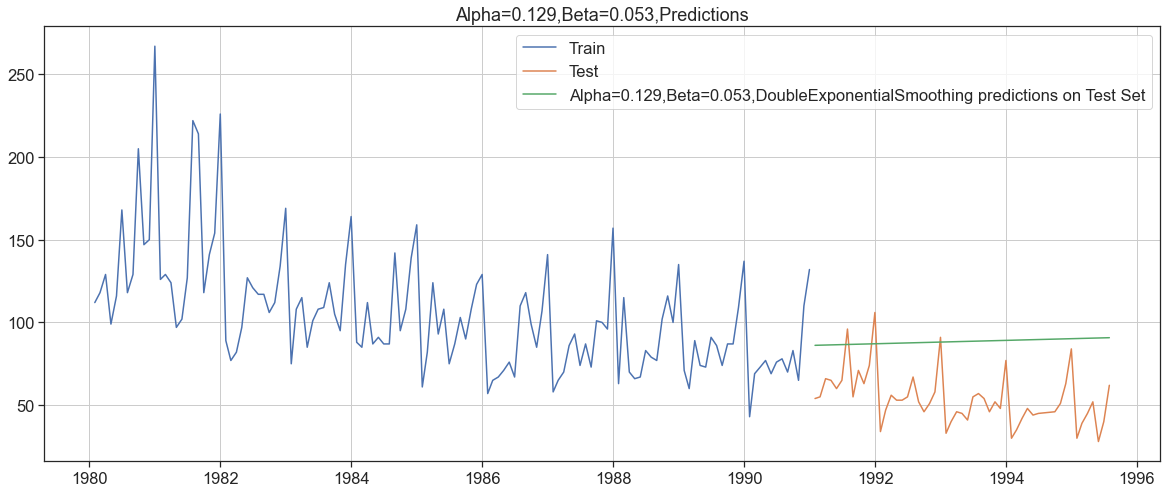

In [74]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.129,Beta=0.053,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.129,Beta=0.053,Predictions');

In [75]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': [],'Train MAPE':[],
                            'Test MAPE':[]})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,
                                          'Train RMSE':rmse_model6_train,
                                          'Test RMSE':rmse_model6_test,
                                          'Train MAPE':mape_model6_train,
                                          'Test MAPE':mape_model6_test}, ignore_index=True)

In [76]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,0.1,0.1,34.439111,36.923416,24.83,63.78
1,0.1,0.2,33.450729,48.688648,24.45,83.09
10,0.2,0.1,33.097427,65.731702,23.69,113.20
2,0.1,0.3,33.145789,78.156641,24.46,131.25
20,0.3,0.1,33.611269,98.653317,23.80,170.12


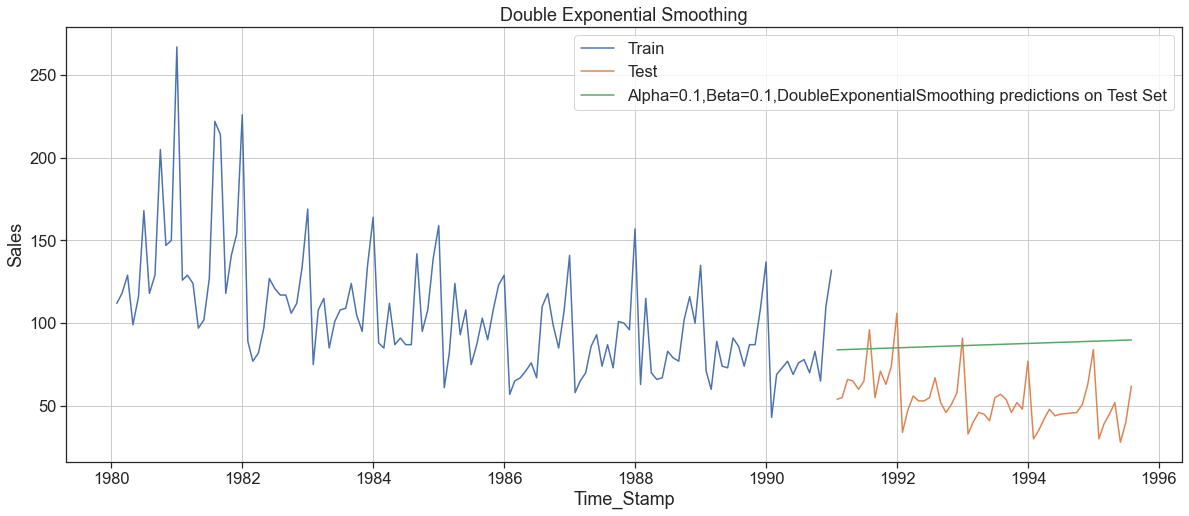

In [77]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.title("Double Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

In [78]:
resultsDf_7_1 = pd.DataFrame({'Train RMSE': [resultsDf_7['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_7['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_7['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDf_7_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41
SimpleAverageModel,36.034234,53.460570,25.39,94.93
2pointTrailingMovingAverage,NaN,11.529278,NaN,13.54
4pointTrailingMovingAverage,NaN,14.451403,NaN,19.49
6pointTrailingMovingAverage,NaN,14.566327,NaN,20.82
9pointTrailingMovingAverage,NaN,14.727630,NaN,21.01
"Alpha=0.1,SimpleExponentialSmoothing",31.815610,36.828033,22.47,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",34.439111,36.923416,24.83,63.78


In [79]:
#Triple Exponential Smoothing (Holt - Winter's Model)
TES_train = train.copy()
TES_test = test.copy()

In [80]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [81]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Time_Stamp,,
1980-01-31,112.0,115.216237
1980-02-29,118.0,126.693361
1980-03-31,129.0,133.327610
1980-04-30,99.0,121.734319
1980-05-31,116.0,128.016119


In [83]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,42.672382
1991-02-28,55.0,54.439917
1991-03-31,66.0,61.841877
1991-04-30,65.0,50.636896
1991-05-31,60.0,58.918913


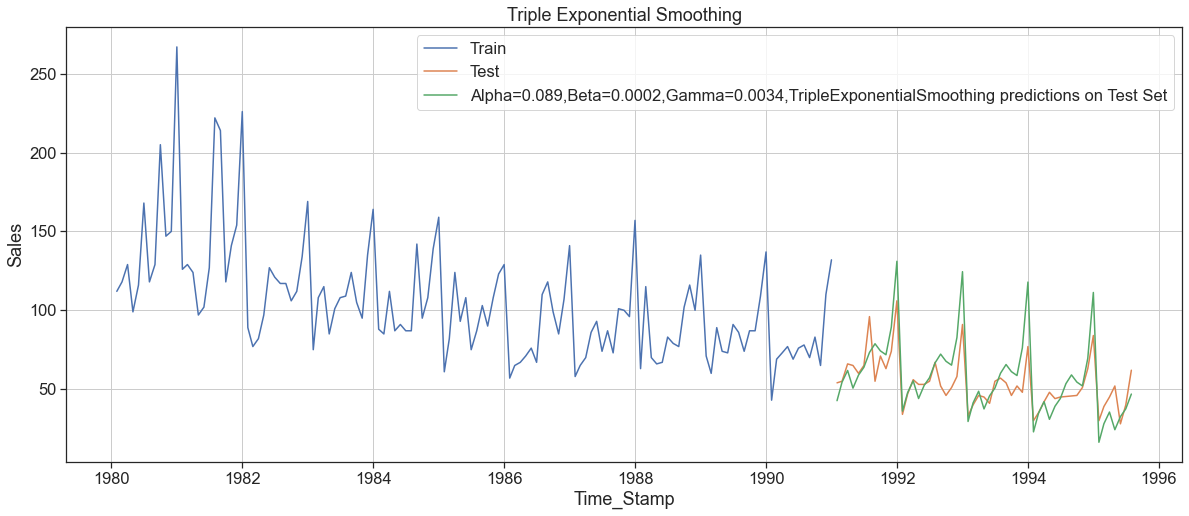

In [84]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.089,Beta=0.0002,Gamma=0.0034,TripleExponentialSmoothing predictions on Test Set')
plt.title("Triple Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

In [85]:
rmse_model8_train_1=metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model8_train_1=MAPE(TES_train['Rose'],TES_train['auto_predict'])
rmse_model8_test_1=metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model8_test_1=MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is %3.3f" %(rmse_model8_train_1))
print("For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is %3.3f" %(mape_model8_train_1))
print("For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test_1))
print("For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is %3.3f" %(mape_model8_test_1))

For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is 19.516
For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is 13.320
For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.266
For Alpha=0.089,Beta=0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is 19.270


In [86]:
resultsDf_8_1 = pd.DataFrame({'Train RMSE': [rmse_model8_train_1],
                              'Test RMSE': [rmse_model8_test_1],
                              'Train MAPE': [mape_model8_train_1],
                              'Test MAPE': [mape_model8_test_1]}
                           ,index=['Alpha=0.089,Beta=0.0002,Gamma=0.0034,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDf_8_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,30.718135,15.268955,21.22,22.82
NaiveModel,45.063760,17.740327,36.38,27.41
SimpleAverageModel,36.034234,53.460570,25.39,94.93
2pointTrailingMovingAverage,NaN,11.529278,NaN,13.54
4pointTrailingMovingAverage,NaN,14.451403,NaN,19.49
6pointTrailingMovingAverage,NaN,14.566327,NaN,20.82
9pointTrailingMovingAverage,NaN,14.727630,NaN,21.01
"Alpha=0.1,SimpleExponentialSmoothing",31.815610,36.828033,22.47,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",34.439111,36.923416,24.83,63.78
"Alpha=0.089,Beta=0.0002,Gamma=0.0034,TripleExponentialSmoothing",19.516036,14.265713,13.32,19.27


In [87]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],
                              'Test RMSE': [], 'Train MAPE':[], 'Test MAPE':[]})

In [88]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test,
                                                  'Train MAPE':mape_model8_train,
                                                  'Test MAPE':mape_model8_test}
                                                 , ignore_index=True)

In [89]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,0.1,0.1,0.1,21.332001,14.626000,15.73,19.77
1,0.1,0.1,0.2,21.376545,13.261559,15.66,17.98
2,0.1,0.1,0.3,21.711811,13.277107,15.70,18.15
3,0.1,0.1,0.4,22.223992,13.612488,15.87,18.64
4,0.1,0.1,0.5,22.868747,14.022961,16.08,19.28
...,...,...,...,...,...,...,...
724,0.9,0.9,0.5,108.335292,3655.671855,82.77,5988.59
725,0.9,0.9,0.6,229.341932,6894.737479,159.91,11248.57
726,0.9,0.9,0.7,647.851629,19315.421997,395.02,31412.03
727,0.9,0.9,0.8,2025.875258,68265.919595,1047.12,110816.97


In [90]:
resultsDf_8_2f=resultsDf_8_2.sort_values(by=['Test RMSE']).head(5)
resultsDf_8_2f

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
29,0.1,0.4,0.3,22.673408,11.976399,16.55,16.10
20,0.1,0.3,0.3,22.293608,12.033831,16.15,16.17
11,0.1,0.2,0.3,22.006153,12.080481,16.01,16.40
12,0.1,0.2,0.4,22.544393,12.082993,16.26,16.33
21,0.1,0.3,0.4,22.893136,12.220261,16.44,16.50


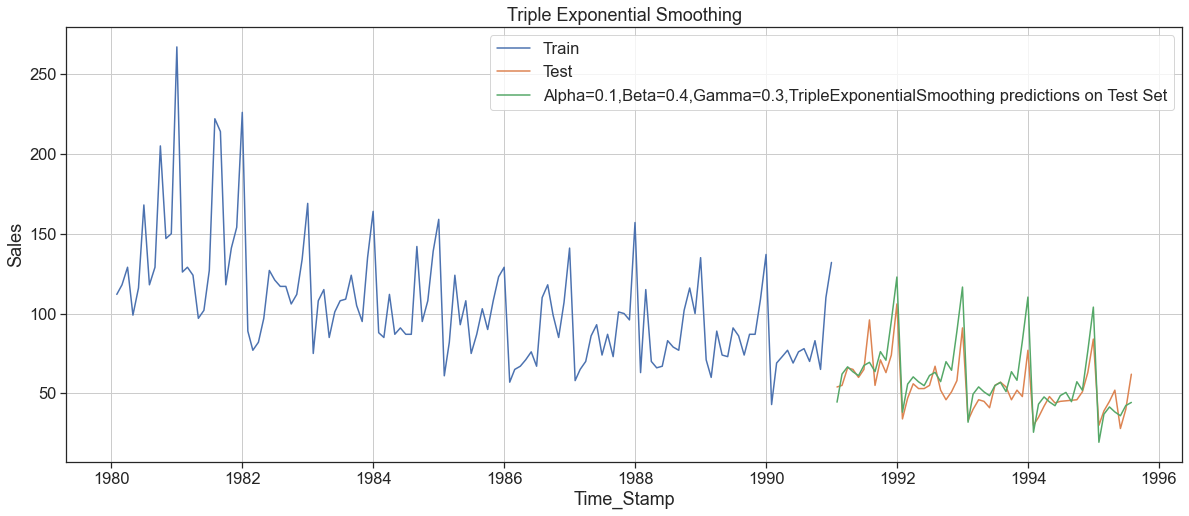

In [91]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['Rose'],label='Train')
plt.plot(TES_test['Rose'],label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.1, 0.4, 0.4],label='Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.title("Triple Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

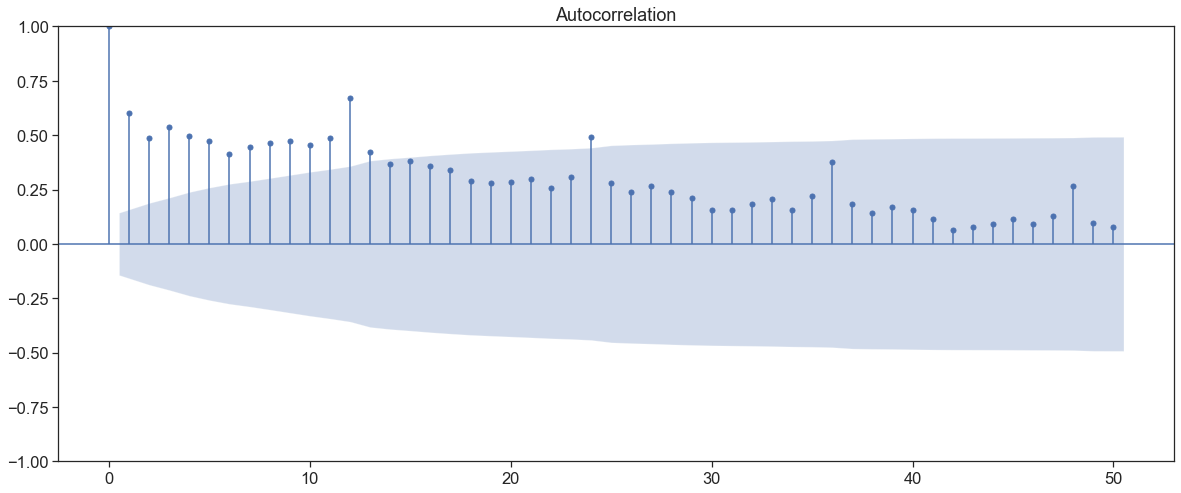

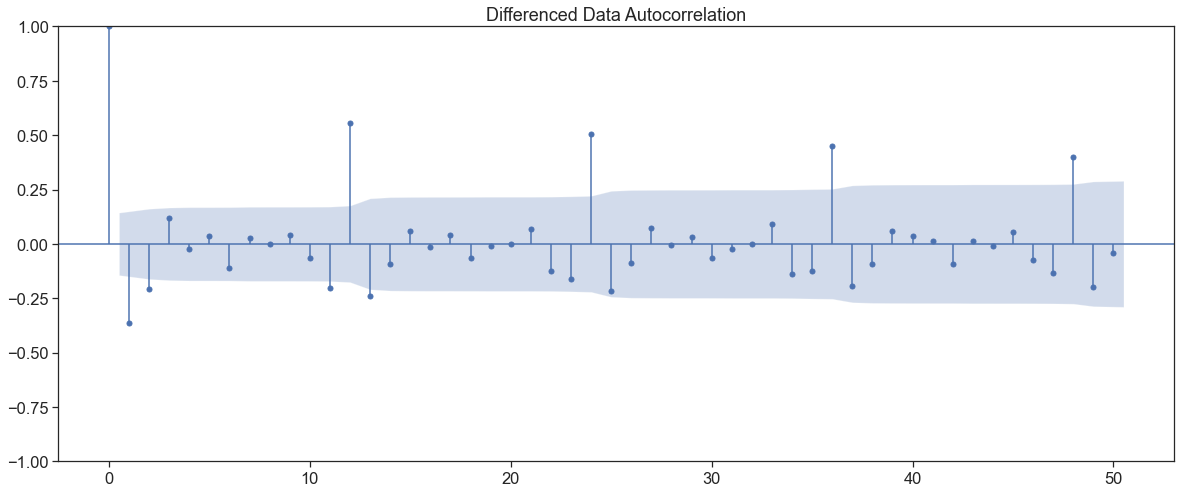

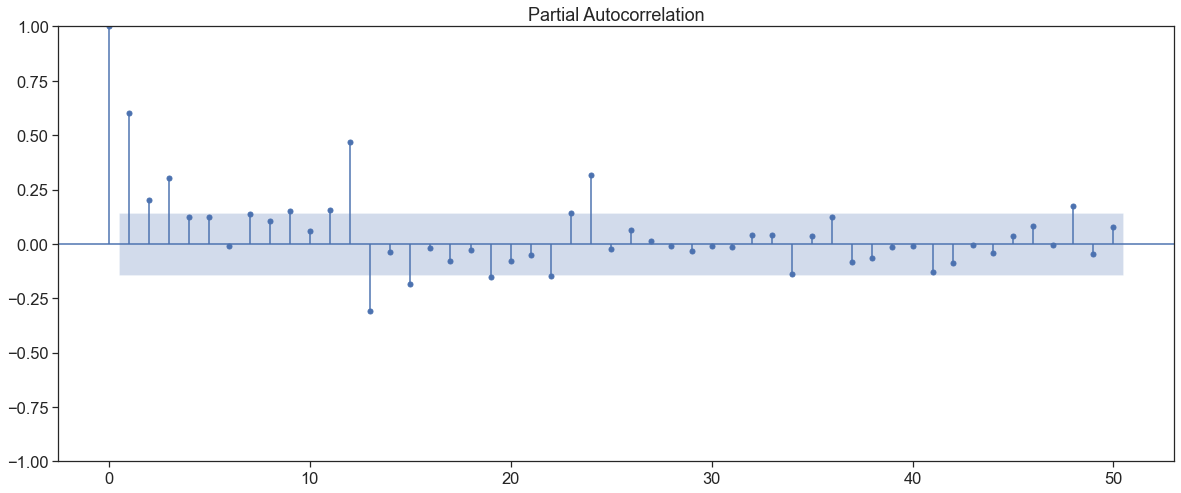

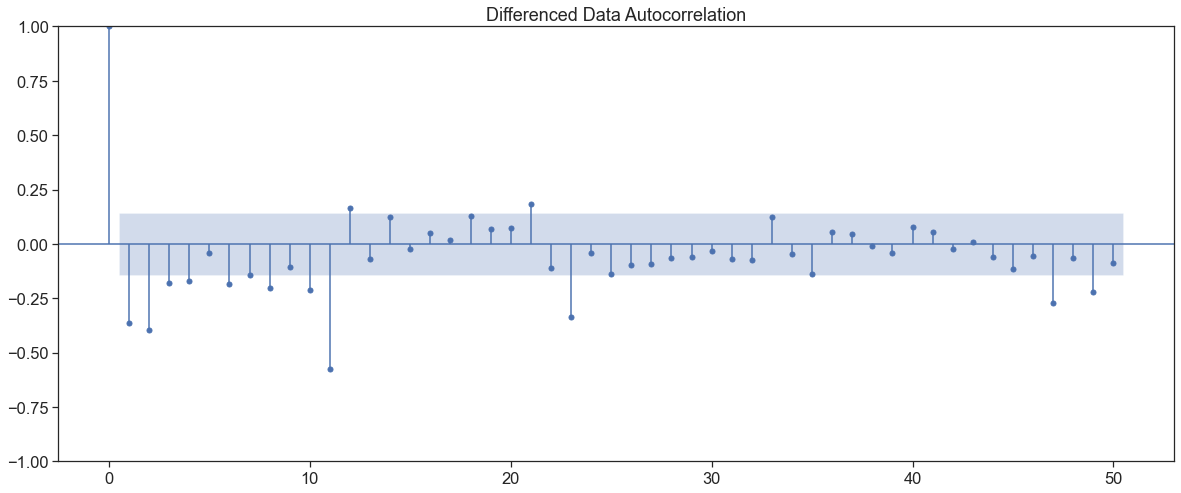

In [92]:
# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.
plot_acf(rose['Rose'],lags=50)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose['Rose'],lags=50)
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [93]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Time_Stamp")
    plt.ylabel("Sales")
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

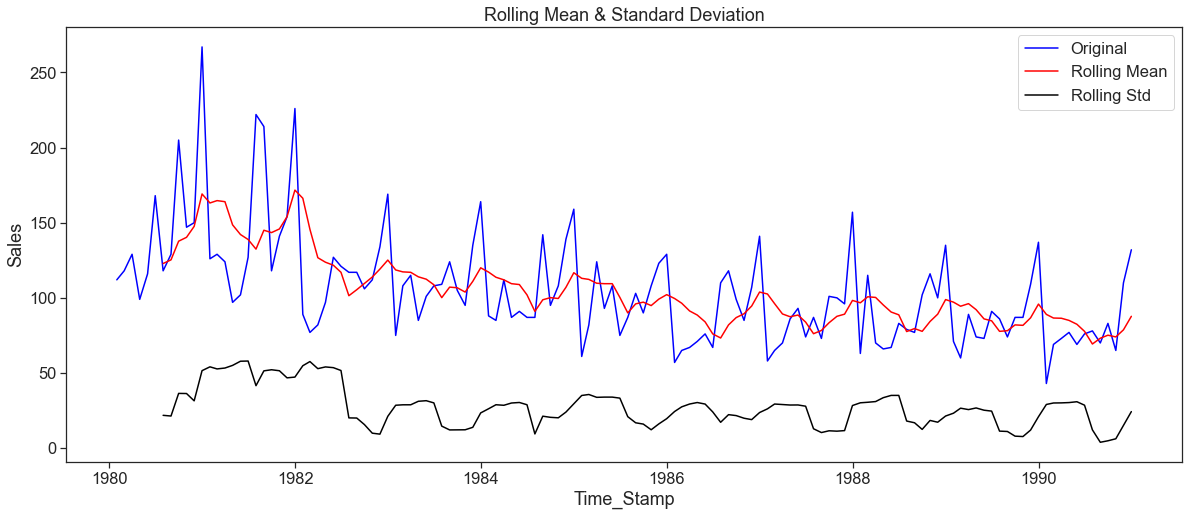

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [94]:
test_stationarity(train['Rose'])

In [95]:
(train['Rose'].diff()).dropna()

Time_Stamp
1980-02-29     6.0
1980-03-31    11.0
1980-04-30   -30.0
1980-05-31    17.0
1980-06-30    52.0
              ... 
1990-08-31    -8.0
1990-09-30    13.0
1990-10-31   -18.0
1990-11-30    45.0
1990-12-31    22.0
Name: Rose, Length: 131, dtype: float64

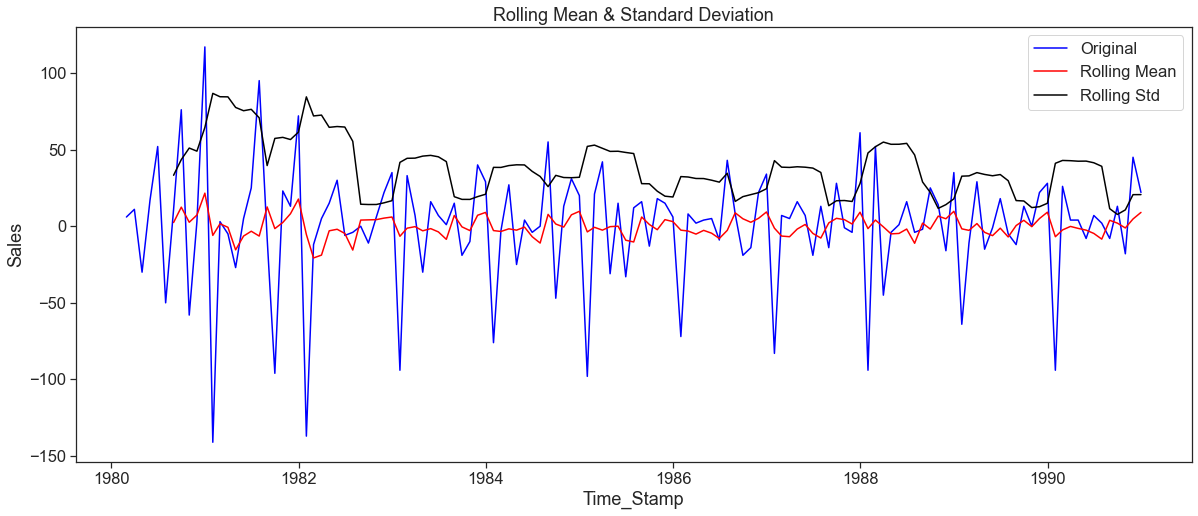

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [96]:
test_stationarity(train['Rose'].diff().dropna())

In [97]:
#Building ARIMA Model
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(0, 1, 4) - AIC:1281.676698214394
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.870722330997
ARIMA(1, 1, 4) - AIC:1279.6052626391524
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168
ARIMA(2, 1, 3) - AIC:1274.6953190416875
ARIMA(2, 1, 4) - AIC:1278.7704960602816
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6543993387522
ARIMA(3, 1, 4) - AIC:1287.719076875994
ARIMA(4, 1, 0) - AIC:1296.3266569004518
ARIMA(4, 1, 1) - AIC:1283.7931715123066
ARIMA(4, 1, 2) - AIC:1285.7182485638677
ARIMA(4, 1, 3) - AIC:1278.4514044587568
ARIMA(4, 1, 4) - AIC:1282.3372539757333


In [99]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
13,"(2, 1, 3)",1274.695319
23,"(4, 1, 3)",1278.451404
18,"(3, 1, 3)",1278.654399
14,"(2, 1, 4)",1278.770496
9,"(1, 1, 4)",1279.605263
2,"(0, 1, 2)",1279.671529
7,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
6,"(1, 1, 1)",1280.57423
11,"(2, 1, 1)",1281.507862


In [100]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Mon, 20 Jun 2022   AIC                           1274.695
Time:                        16:28:54   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.029      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.697      0.000      -0.893      -0.565
ma.L1          1.0447      0.616      1.695      0.0

In [101]:
#Predicting Test Data using models
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
rmse_a = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse_a)

36.81634749426474


In [102]:
result_rose = pd.DataFrame({'RMSE': [rmse_a]},index=['ARIMA(2,1,3) with AIC'])

result_rose

,RMSE
"ARIMA(2,1,3) with AIC",36.816347


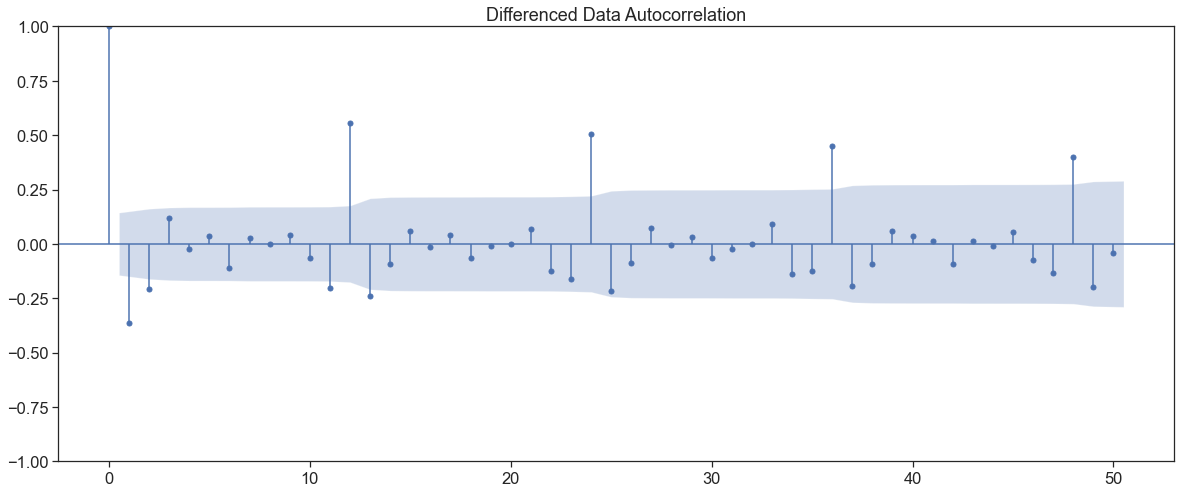

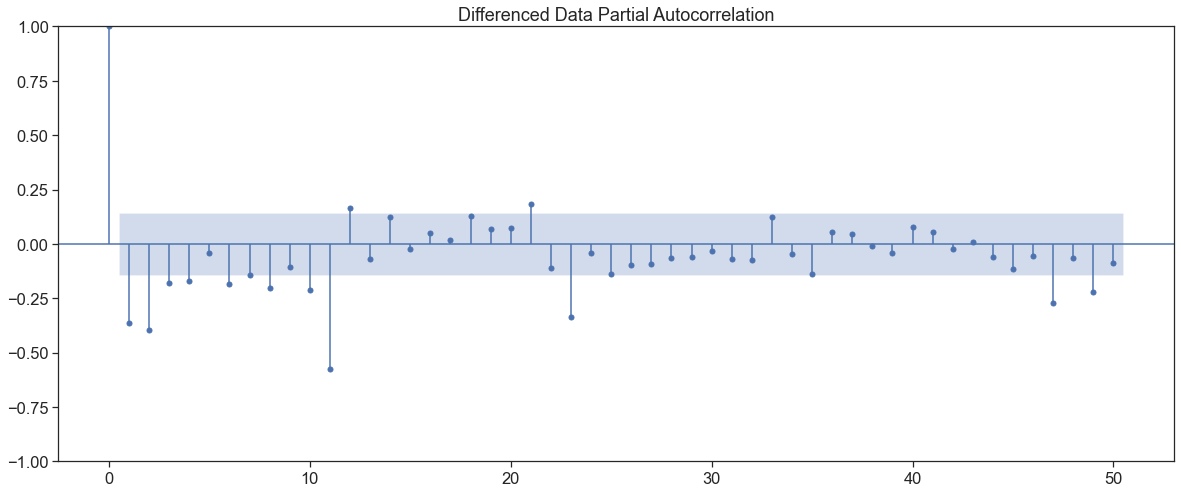

In [103]:
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [104]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Mon, 20 Jun 2022   AIC                           1285.718
Time:                        16:28:56   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

In [105]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [106]:
rmse_p = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse_p)

37.03763927718572


In [107]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_p]},index=['ARIMA(4,1,2) with ACF/PACF'])
result_rose = pd.concat([result_rose,temp_resultsDf])
result_rose

,RMSE
"ARIMA(2,1,3) with AIC",36.816347
"ARIMA(4,1,2) with ACF/PACF",37.037639


In [108]:
p = q = range(0, 4)
P=Q=range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3121.6260574415173
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386875
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754128
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4600.377507188015
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697533
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945637
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3521.2956189436404
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702789318
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128678
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3545.1662352209396
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3964.894266521814
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608099839
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369456
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286588
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3518.7493042080323
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600272979
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259079526
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887388089
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3688.8578322490257
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146698
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598225
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311104222
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3765.909484819454
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713714093
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909352203709
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488813057
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3428.6971087978322
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441325917
SARIMA(2, 1, 2)x(2, 0

In [110]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880935
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.49533
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561019


In [111]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Mon, 20 Jun 2022   AIC                            774.400
Time:                                         16:36:04   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

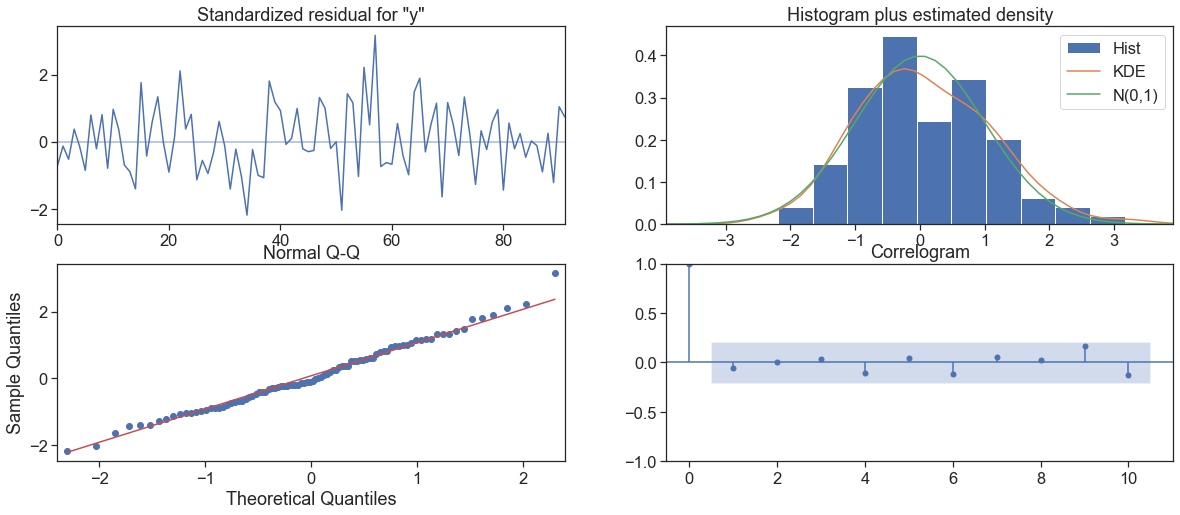

In [112]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [113]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [114]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.237877,13.907054,27.980553,82.495202
1,68.121912,13.990517,40.701002,95.542821
2,67.909505,14.011571,40.447331,95.371679
3,66.786285,14.098878,39.152992,94.419578
4,69.761714,14.108237,42.110078,97.413350


In [115]:
rmse_sp = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_sp)

18.882257117781155


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_sp]},index=['SARIMA(3,1,1)(3,0,2,12) with AIC'])
result_rose = pd.concat([result_rose,temp_resultsDf])
result_rose

,RMSE
"ARIMA(2,1,3) with AIC",36.816347
"ARIMA(4,1,2) with ACF/PACF",37.037639
"SARIMA(3,1,1)(3,0,2,12) with AIC",18.882257


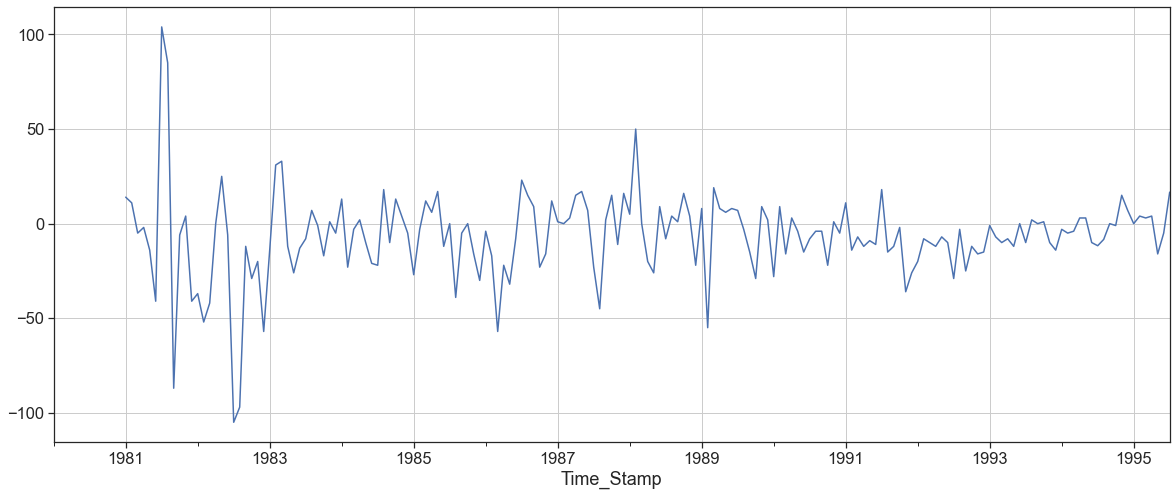

In [117]:
(rose['Rose'].diff(12)).plot()
plt.grid();

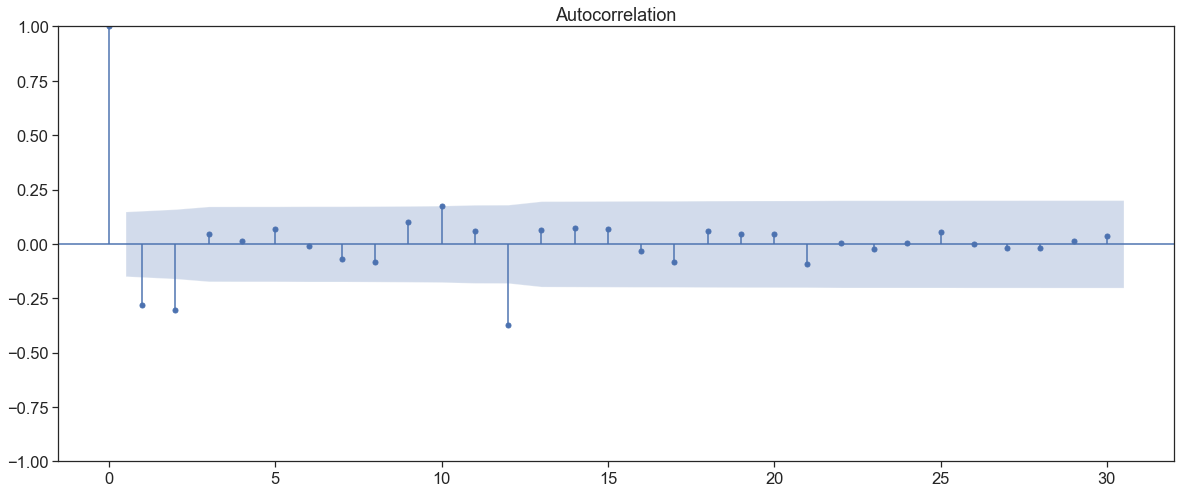

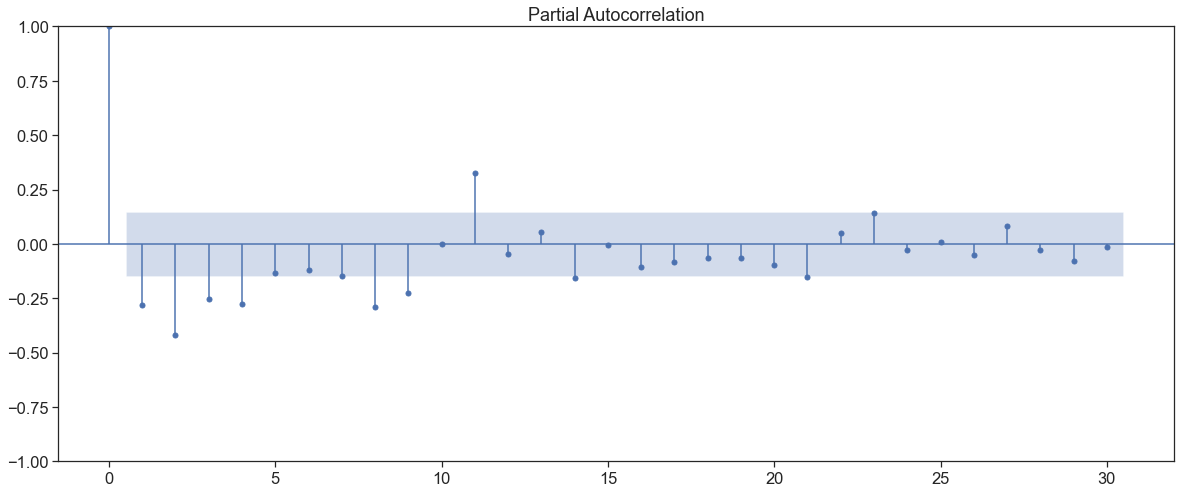

In [118]:
plot_acf((rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [119]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 3),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(4, 1, 3)x(3, 0, [1, 2], 12)   Log Likelihood                -373.493
Date:                                 Mon, 20 Jun 2022   AIC                            772.986
Time:                                         16:36:08   BIC                            805.627
Sample:                                              0   HQIC                           786.155
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0969      0.156      0.621      0.534      -0.209       0

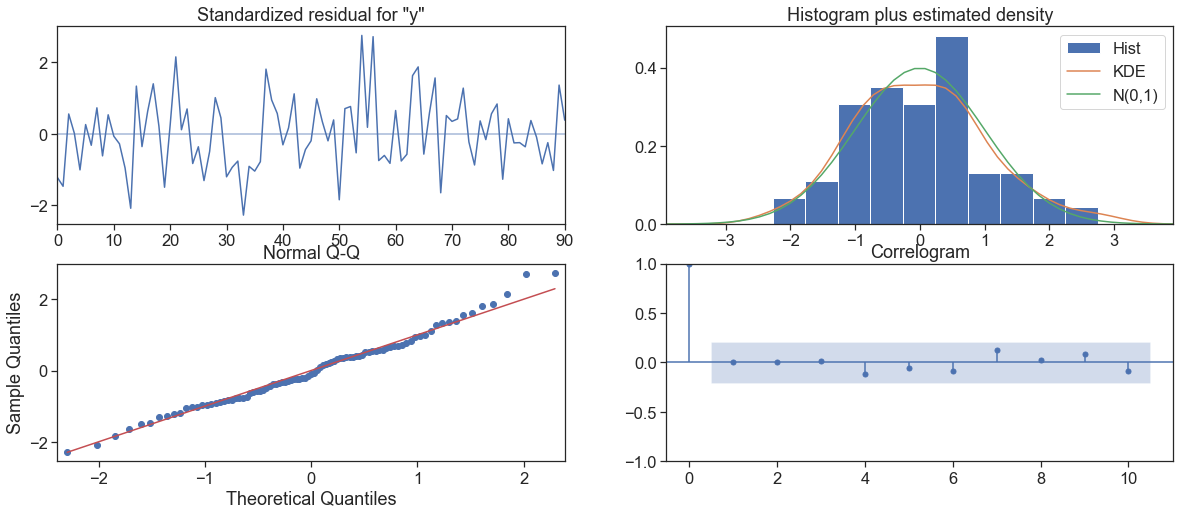

In [120]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [121]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [122]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()
rmse_spm = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_spm)

23.24509955180125


In [123]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_spm]},index=['SARIMA(4,1,3)(3,0,2,12) with ACF/PACF'])
result_rose = pd.concat([result_rose,temp_resultsDf])
result_rose

,RMSE
"ARIMA(2,1,3) with AIC",36.816347
"ARIMA(4,1,2) with ACF/PACF",37.037639
"SARIMA(3,1,1)(3,0,2,12) with AIC",18.882257
"SARIMA(4,1,3)(3,0,2,12) with ACF/PACF",23.245100


In [124]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -581.285
Date:                                 Mon, 20 Jun 2022   AIC                           1182.571
Time:                                         16:36:10   BIC                           1212.475
Sample:                                     01-31-1980   HQIC                          1194.721
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0353      0.094      0.376      0.707      -0.149       0

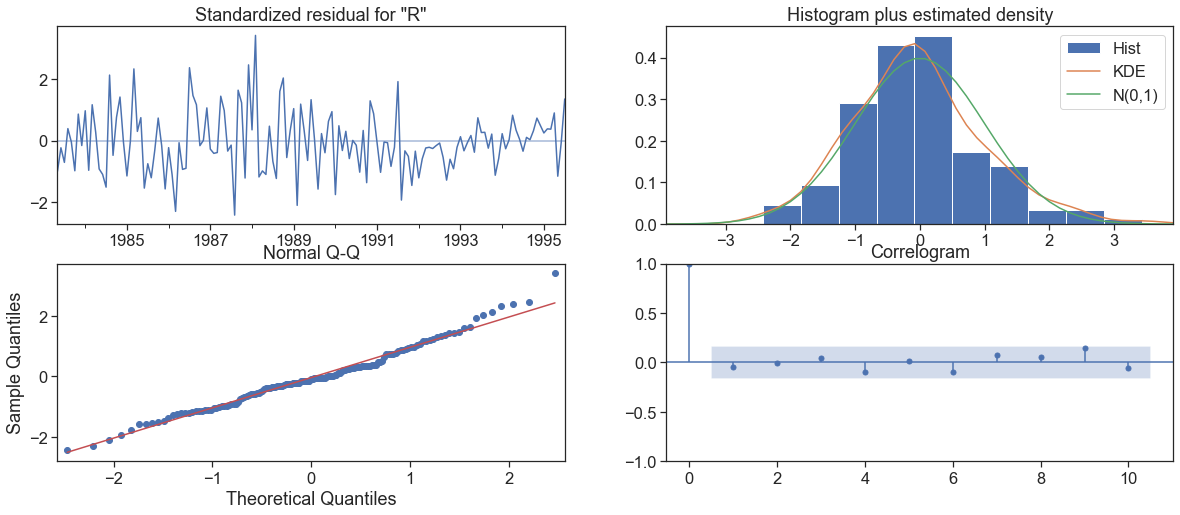

In [125]:
results_full_data_model.plot_diagnostics();

In [126]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [127]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,47.779525,12.227004,23.815037,71.744013
1995-09-30,46.291095,12.390863,22.005451,70.576740
1995-10-31,44.948733,12.472873,20.502350,69.395115
1995-11-30,56.743873,12.476737,32.289917,81.197829
1995-12-31,77.675819,12.536898,53.103951,102.247688


In [128]:
rmse_f = mean_squared_error(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_f)

RMSE of the Full Model 31.051382056757223


In [129]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [130]:
pred_full_manual_SARIMA_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,47.779525,12.227004,23.815037,71.744013
1995-09-30,46.291095,12.390863,22.005451,70.576740
1995-10-31,44.948733,12.472873,20.502350,69.395115
1995-11-30,56.743873,12.476737,32.289917,81.197829
1995-12-31,77.675819,12.536898,53.103951,102.247688
1996-01-31,28.326790,12.615142,3.601566,53.052015
1996-02-29,35.959519,12.722965,11.022966,60.896073
1996-03-31,40.624604,12.801232,15.534652,65.714557
1996-04-30,40.753194,12.875142,15.518380,65.988007
1996-05-31,34.695931,12.944862,9.324468,60.067395


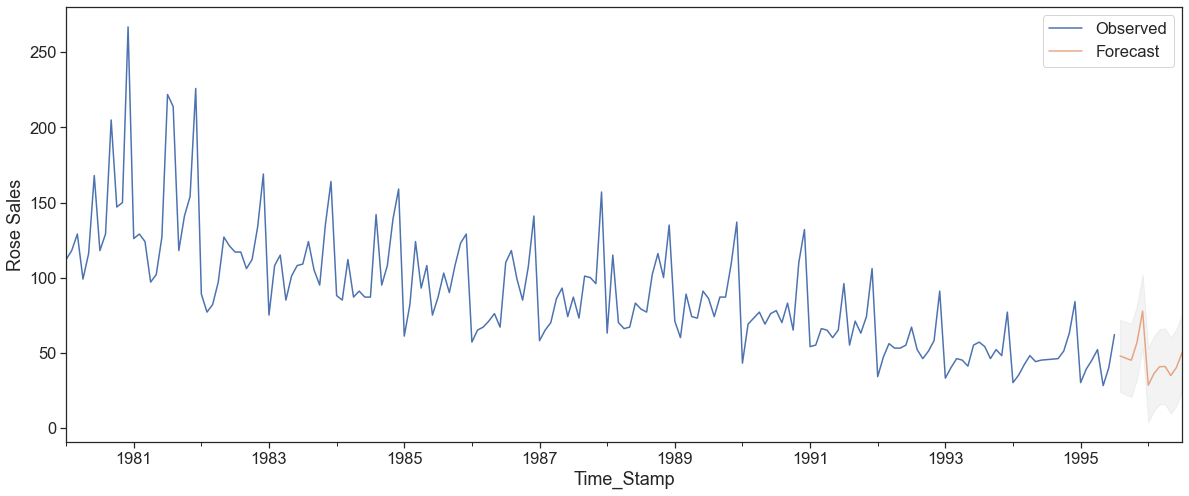

In [131]:
axis = rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

In [132]:
result_rose

,RMSE
"ARIMA(2,1,3) with AIC",36.816347
"ARIMA(4,1,2) with ACF/PACF",37.037639
"SARIMA(3,1,1)(3,0,2,12) with AIC",18.882257
"SARIMA(4,1,3)(3,0,2,12) with ACF/PACF",23.245100


In [133]:
results['Test RMSE']

RegressionOnTime                                                   15.268955
NaiveModel                                                         17.740327
SimpleAverageModel                                                 53.460570
2pointTrailingMovingAverage                                        11.529278
4pointTrailingMovingAverage                                        14.451403
6pointTrailingMovingAverage                                        14.566327
9pointTrailingMovingAverage                                        14.727630
Alpha=0.1,SimpleExponentialSmoothing                               36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing                      36.923416
Alpha=0.089,Beta=0.0002,Gamma=0.0034,TripleExponentialSmoothing    14.265713
Name: Test RMSE, dtype: float64

In [134]:
results1 = pd.DataFrame({'Test RMSE': [rmse_model1_test,rmse_model2_test,rmse_model3_test,rmse_model4_test_2,
                                       rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9,mape_model5_test_1,
                                       resultsDf_6['Test RMSE'][0],resultsDf_7['Test RMSE'][0],
                                      rmse_model8_test_1,resultsDf_8_2f.iloc[0,4],rmse_a,rmse_p,rmse_sp,rmse_spm,rmse_f]},
                       index=['RegressionOnTime','NaiveModel','SimpleAverageModel','2pointTrailingMovingAverage',
                              '4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage',
                              'Alpha=0.098,SimpleExponentialSmoothing','Alpha=0.1,SimpleExponentialSmoothing using Brute',
                              'Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing using Brute',
                              'Alpha=0.089,Beta=0.0002,Gamma=0.0034,TripleExponentialSmoothing',
                              'Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing using Brute','ARIMA(2,1,3) with AIC',
                              'ARIMA(4,1,2) using ACF/PACF',
                              'SARIMA(3,1,1)(3,0,2,12) with AIC','SARIMA(4,1,3)(3,0,2,12) using ACF/PACF','RMSE of the Full Model'
                             ])

In [135]:
results1

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,17.740327
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.098,SimpleExponentialSmoothing",63.880000
"Alpha=0.1,SimpleExponentialSmoothing using Brute",36.828033
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing using Brute",36.923416


In [136]:
tripleES_full_rose = ExponentialSmoothing(rose, trend='additive', seasonal='multiplicative').fit(smoothing_level=0.1, 
                                                                                                 smoothing_trend=0.4, 
                                                                                                 smoothing_seasonal=0.3)

In [137]:
print(tripleES_full_rose.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          62806.813
Optimized:                         True   AIC                           1119.725
Trend:                         Additive   BIC                           1171.423
Seasonal:                Multiplicative   AICC                          1123.796
Seasonal Periods:                    12   Date:                 Mon, 20 Jun 2022
Box-Cox:                          False   Time:                         16:36:11
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [138]:
predicted_TES_full_data = tripleES_full_rose.forecast(12)

In [139]:
predicted_TES_full_data

1995-08-31    47.346580
1995-09-30    47.411279
1995-10-31    50.250475
1995-11-30    58.164342
1995-12-31    82.046057
1996-01-31    30.618893
1996-02-29    38.252406
1996-03-31    44.441009
1996-04-30    47.262342
1996-05-31    38.300962
1996-06-30    45.691891
1996-07-31    53.127546
Freq: M, dtype: float64

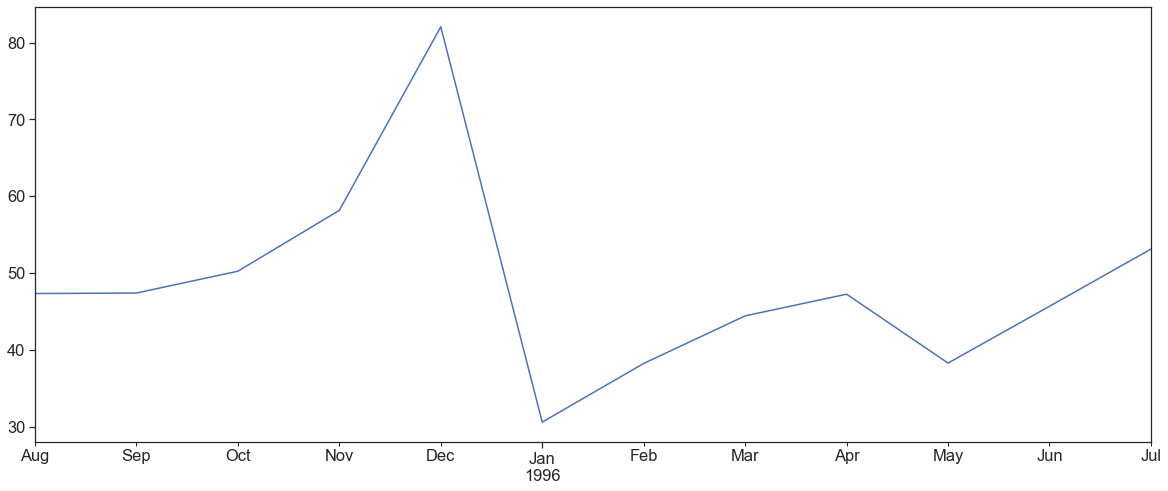

In [140]:
predicted_TES_full_data.plot();

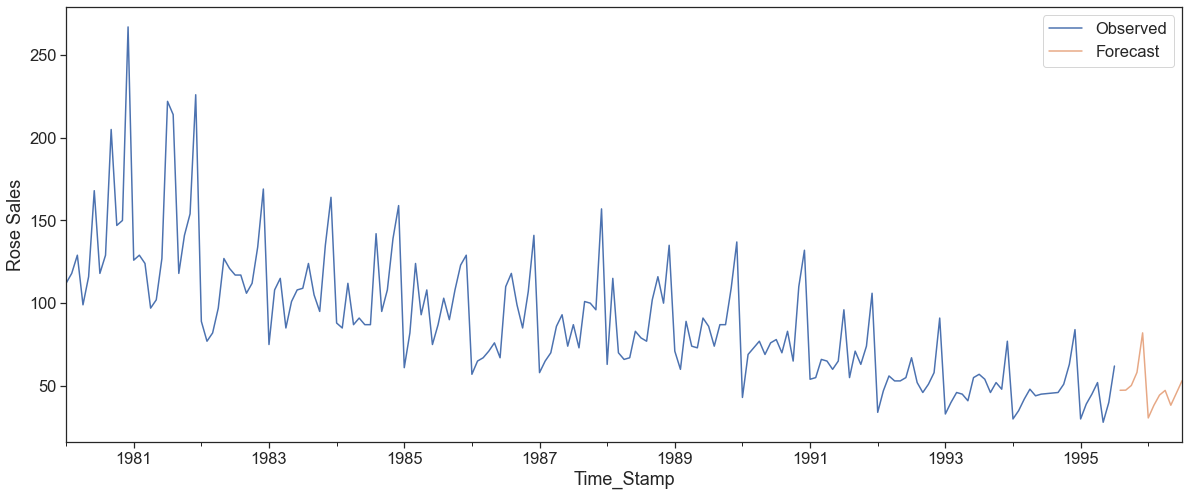

In [141]:
plt.figure(figsize=(20,8))
axis = rose['Rose'].plot(label='Observed')
predicted_TES_full_data.plot(ax=axis, label='Forecast', alpha=0.7)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

